<a href="https://colab.research.google.com/github/Adeeba-Yusuf/IBM-HR-Analytics-Employee-Attrition-Prediction-/blob/main/IBM_HR_Analytics_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/IBM-HR-Analytics-Employee-Attrition-and-Performance.csv")


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.isna( ).sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.select_dtypes(np.number).shape

(1470, 26)

In [ ]:
for column in df.columns:
    if df[column].nunique() < 20:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("_____________________________________________________________")

Value counts for column 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_____________________________________________________________
Value counts for column 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_____________________________________________________________
Value counts for column 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
_____________________________________________________________
Value counts for column 'Education':
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
_____________________________________________________________
Value counts for column 'EducationField':
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: coun

In [ ]:
df.DailyRate.value_counts()

,count
DailyRate,
691,6
1082,5
329,5
530,5
408,5
...,...
1382,1
161,1
801,1



Observation Report: We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 31)

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


<Axes: >

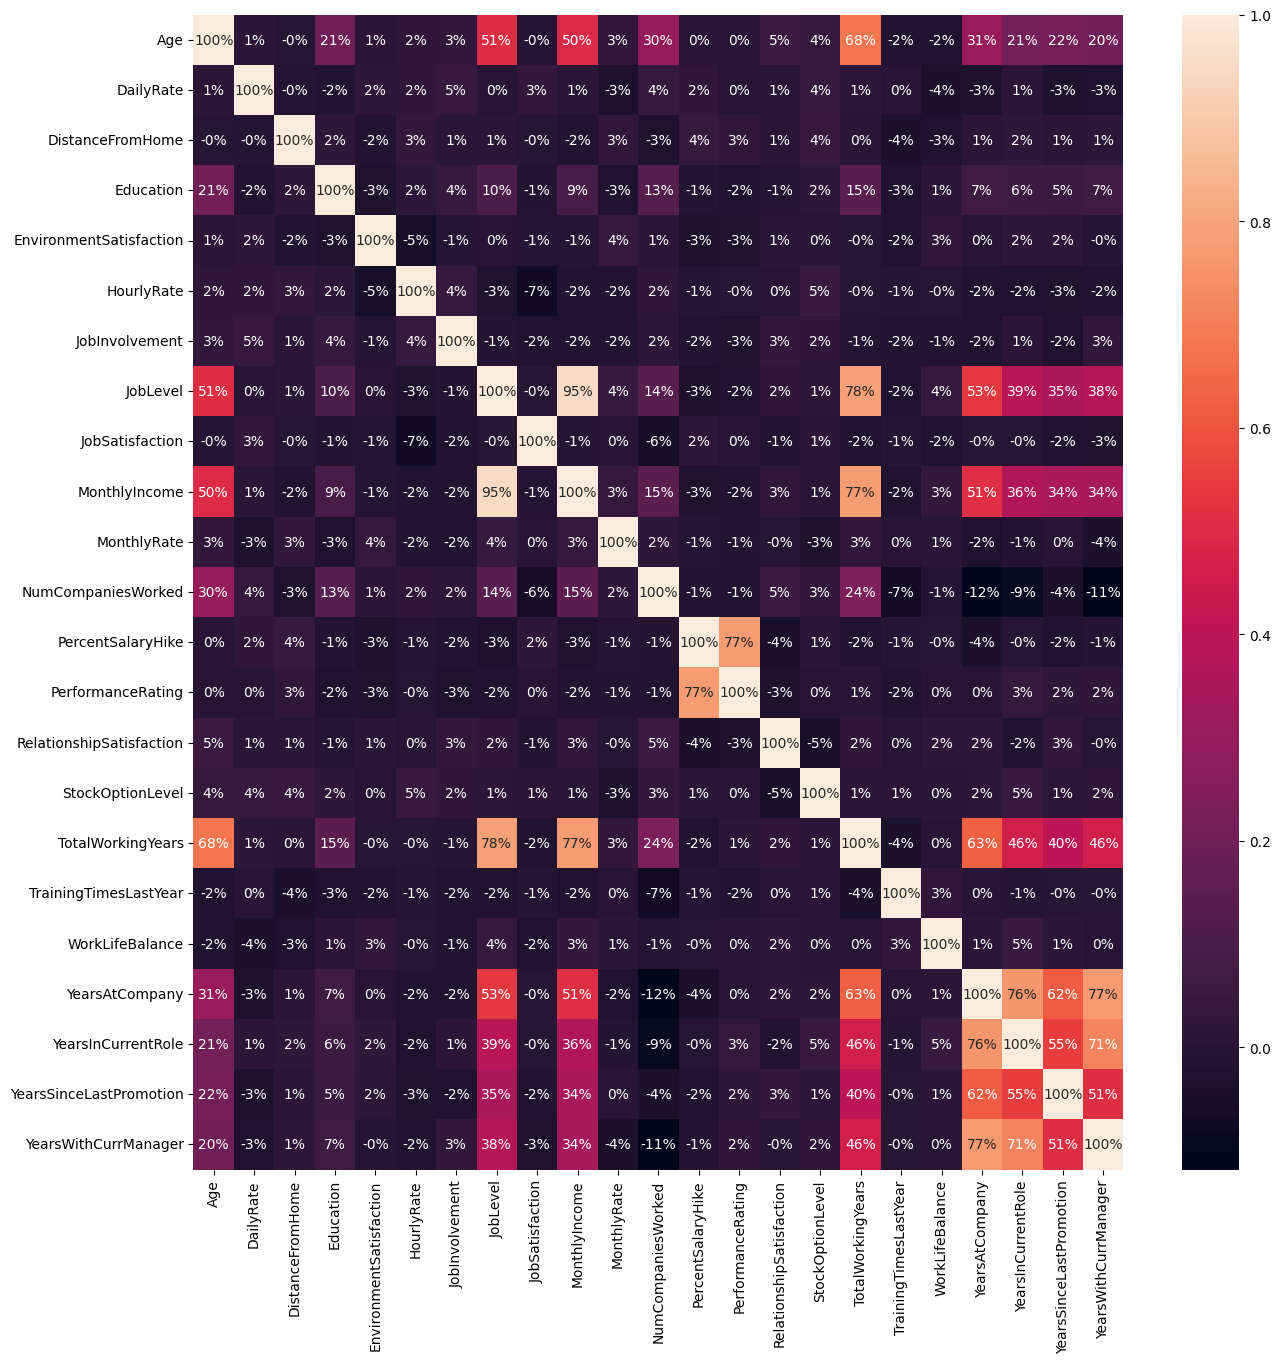

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only= True), annot=True,fmt='.0%')

In [ ]:
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


#STATISTICAL ANALYSIS

In [ ]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

# Library for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
employee_data = df #pd.read_csv('/content/IBM-HR-Analytics-Employee-Attrition-and-Performance.csv')

#PERFORM ANOVA TEST

In [ ]:
num_cols = employee_data.select_dtypes(np.number).columns

In [ ]:
new_df = employee_data.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

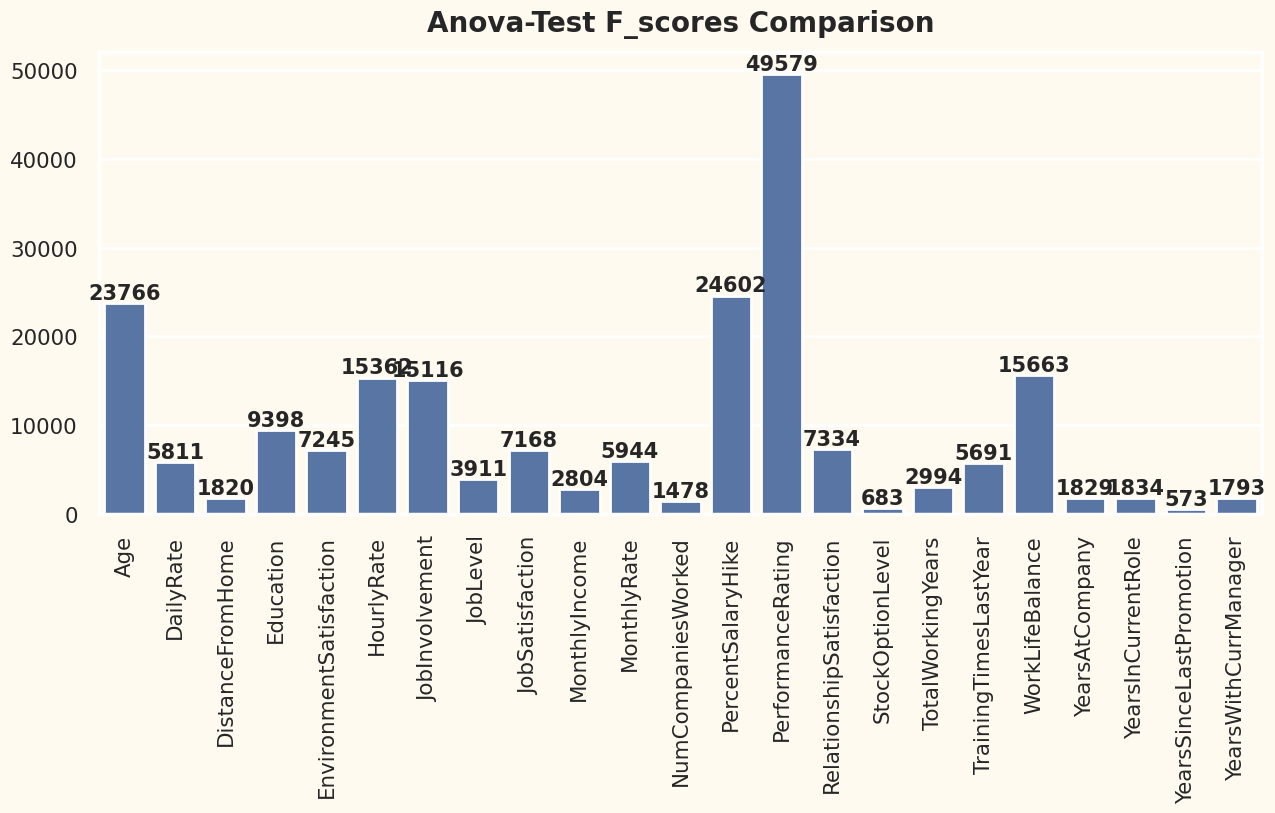

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [ ]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [ ]:
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,Education,9398.987566,0.00000000000000000000
4,EnvironmentSatisfaction,7245.704914,0.00000000000000000000
5,HourlyRate,15362.122371,0.00000000000000000000
6,JobInvolvement,15116.579563,0.00000000000000000000
7,JobLevel,3911.331585,0.00000000000000000000
8,JobSatisfaction,7168.703089,0.00000000000000000000
9,MonthlyIncome,2804.459632,0.00000000000000000000


# VISUALIZE THE CHI-SQUARE STATISTICS VALUES

In [ ]:
cat_cols = employee_data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(employee_data[col], employee_data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

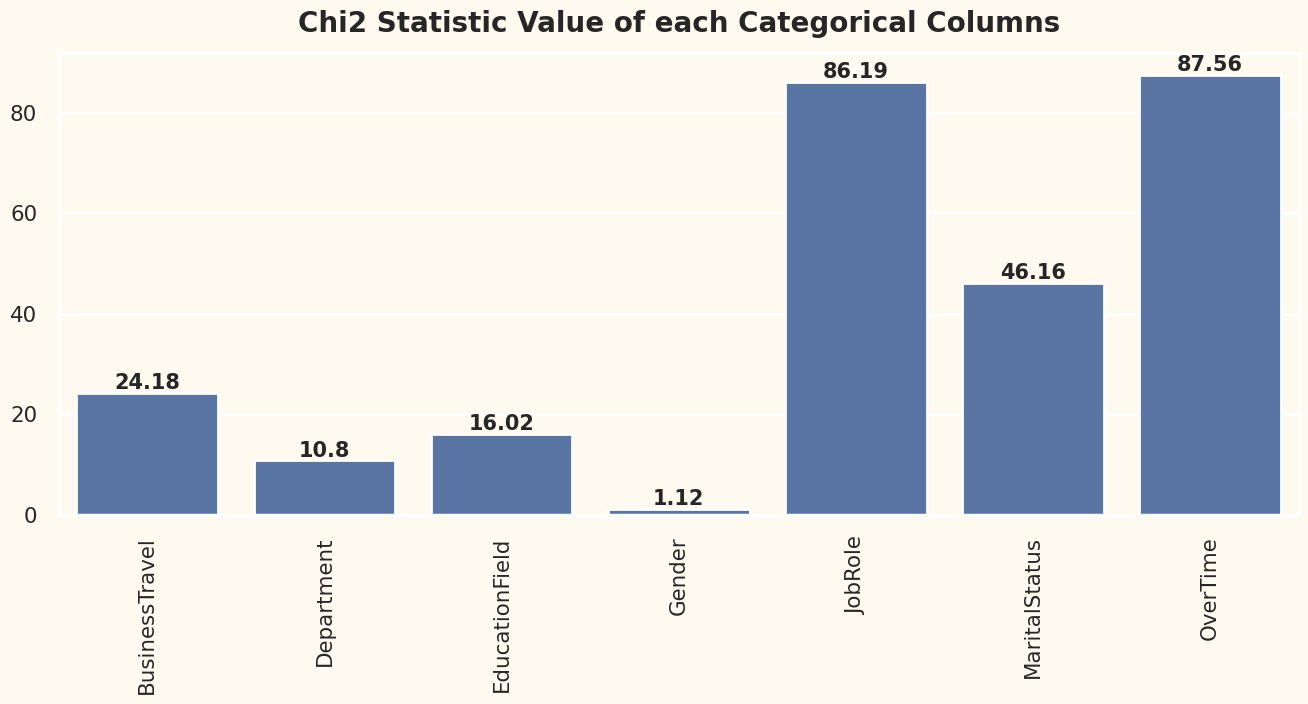

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

#COMPARING CHI^2_STATISTICS AND P_VALUE OF CHI^2 TEST.

In [ ]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [ ]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,EducationField,16.024674,0.00677398013902521211
3,Gender,1.116967,0.29057244902890855265
4,JobRole,86.190254,0.00000000000000275248
5,MaritalStatus,46.163677,0.00000000009455511060
6,OverTime,87.564294,0.00000000000000000001


## Labelling Categories in Numerical Feature

In [ ]:
# Convert categorical variables into numerical form.
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [ ]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')


In [ ]:
pd.options.display.max_rows = None
data.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
HourlyRate,int64
MonthlyIncome,int64
MonthlyRate,int64
TotalWorkingYears,int64
YearsAtCompany,int64
BusinessTravel_Travel_Frequently,uint8


In [ ]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1,1102,1,94,5993,19479,8,6,0,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1373,2,92,2090,2396,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1392,3,56,2909,23159,8,8,1,...,0,0,0,0,0,0,0,0,0,0
4,27,0,591,2,40,3468,16632,6,2,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(1470, 136)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
BusinessTravel_Travel_Frequently,1470.0,0.188435,0.391193,0.0,0.0,0.0,0.00,1.0


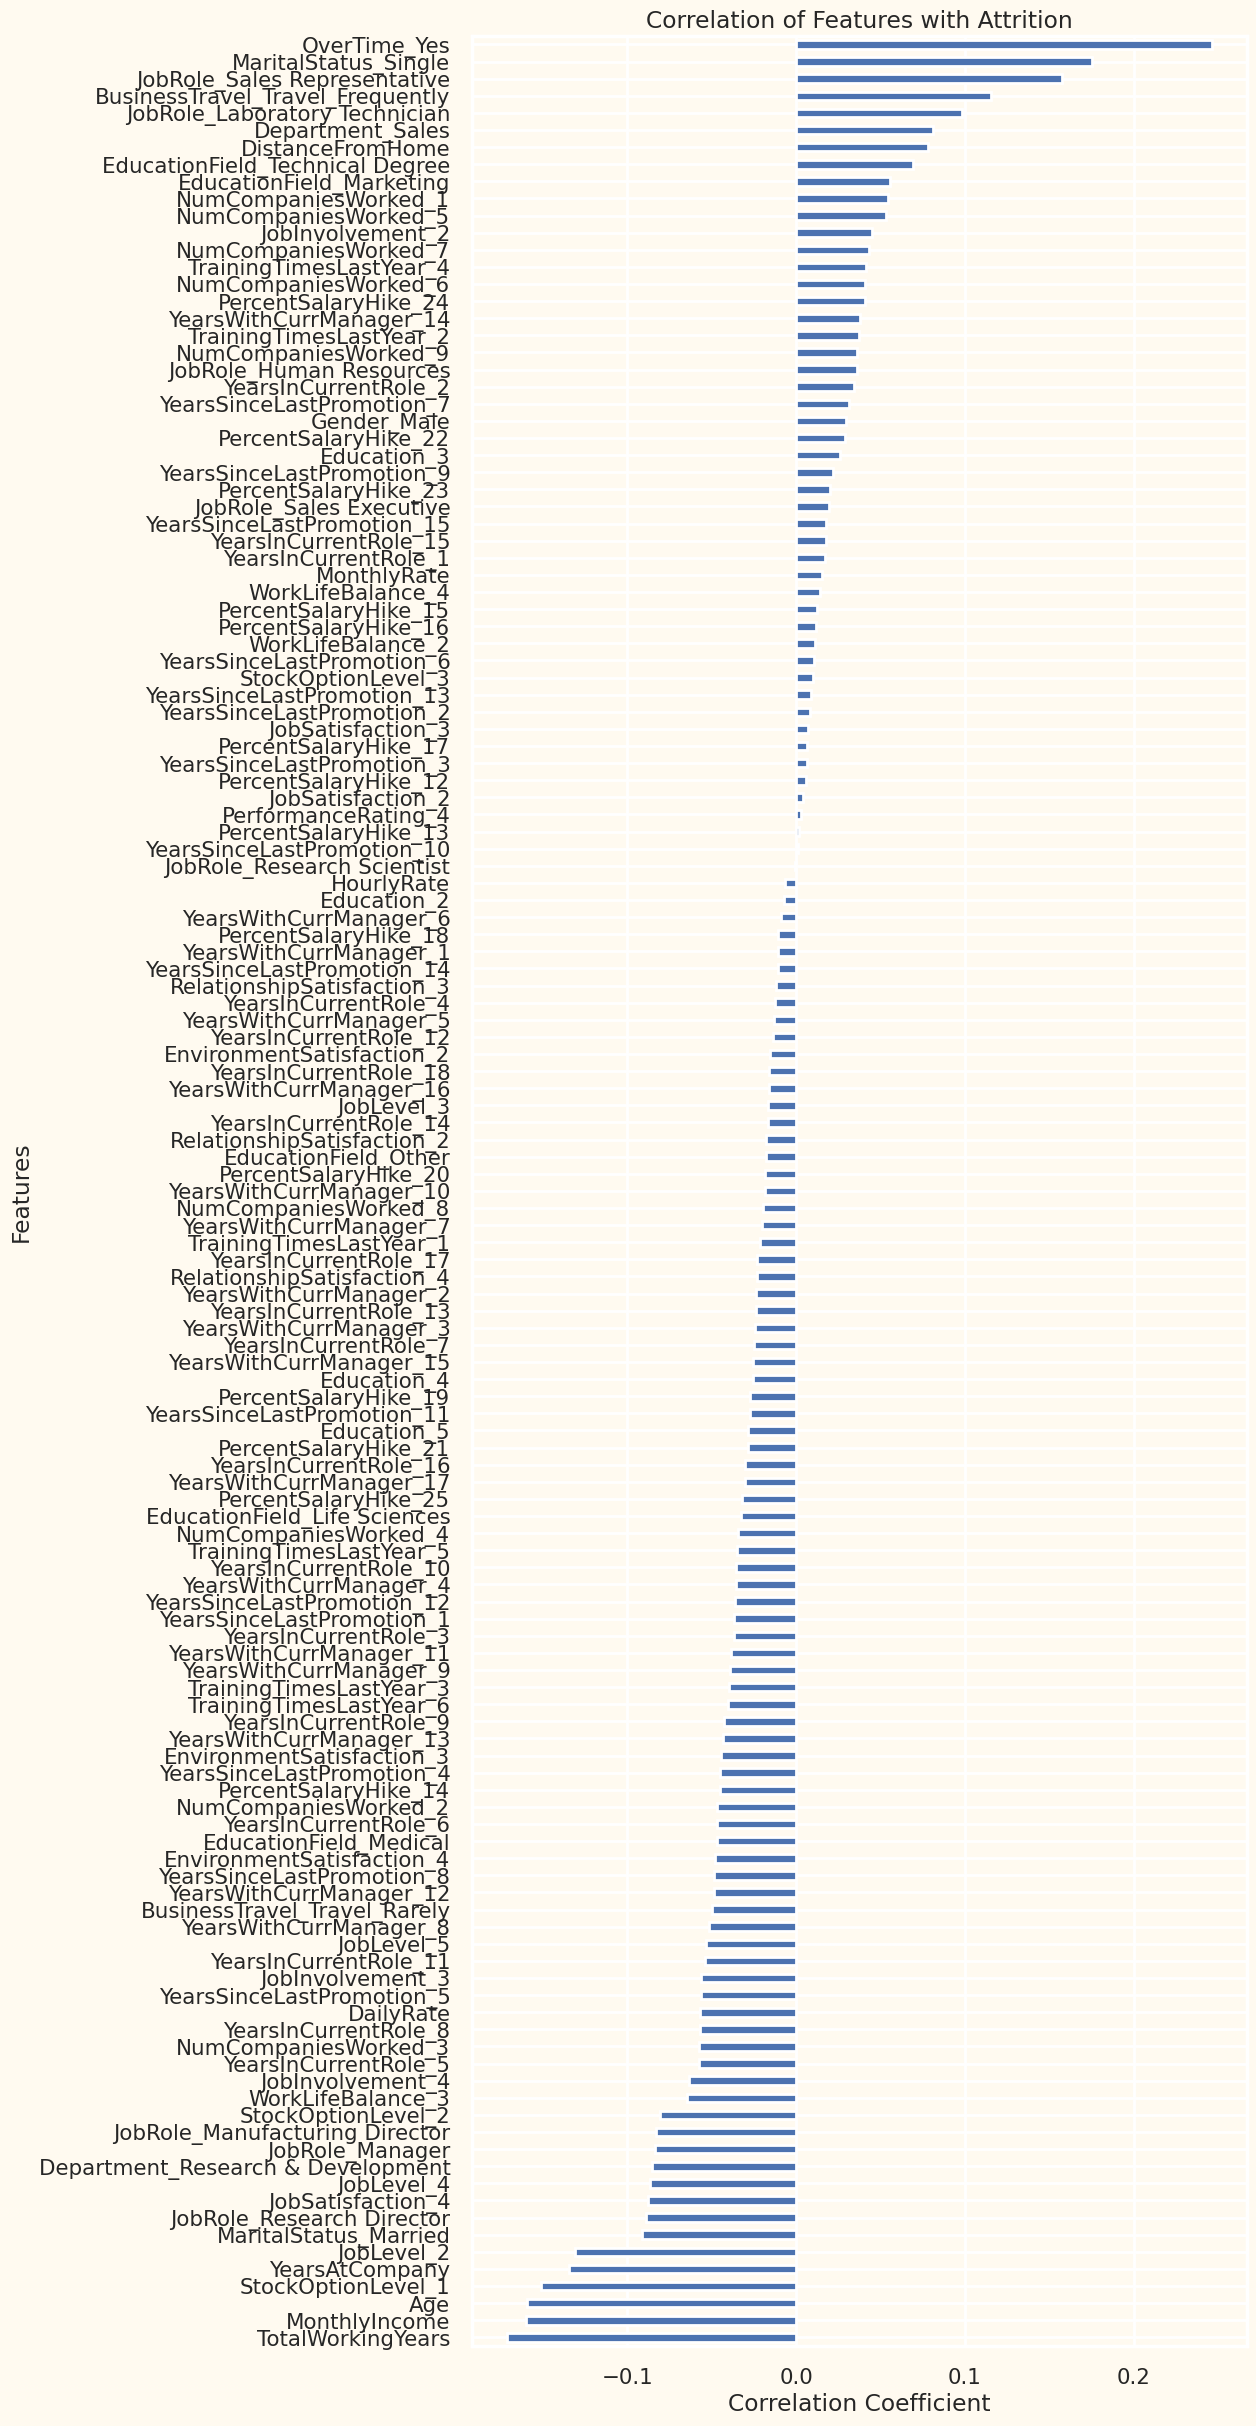

In [ ]:
correlation_with_attrition = data.drop('Attrition', axis=1).corrwith(data['Attrition'])
# Plot the results
correlation_with_attrition.sort_values().plot(kind='barh', figsize=(10, 30))
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#Splitting

In [ ]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
X_train.shape, X_test.shape

((1029, 135), (441, 135))

##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# X_train.head()
print(X_train_std[5:])

[[-0.53985373  0.49174795 -0.89477879 ... -0.04412958 -0.03118914
  -0.0624695 ]
 [-0.10321825 -0.61272833  1.06682414 ... -0.04412958 -0.03118914
  -0.0624695 ]
 [-0.32153599  1.36979401 -0.52697824 ... -0.04412958 -0.03118914
  -0.0624695 ]
 ...
 [-1.63144244 -1.49077439 -0.15917769 ... -0.04412958 -0.03118914
  -0.0624695 ]
 [-0.10321825 -0.95488955 -0.89477879 ... -0.04412958 -0.03118914
  -0.0624695 ]
 [ 0.22425836 -0.10955007  1.31202451 ... -0.04412958 -0.03118914
  -0.0624695 ]]


In [ ]:
# y_train.value_counts()
y_train.shape

(1029,)

In [ ]:
# checking training and testing data has nearly same rate of staying and
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]
print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [ ]:
def evaluate(model,X_train,X_test,y_train,y_test):
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  print("Training Results: \n--------------------------------------")
  clf_report = pd.DataFrame(classification_report(y_train,y_train_pred,output_dict=True))
  print(f"Confusion Matrix: \n{confusion_matrix(y_train,y_train_pred)}")
  print(f"Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
  print(f"classification Report: \n{clf_report}")

  print("TESTING RESULTS: \n--------------------------------------")
  clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
  print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
  print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

evaluate(lr_clf,X_train_std,X_test_std,y_train,y_test)

In [ ]:
# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     plt.title("Precision/Recall Tradeoff")

In [ ]:
# precision_recall_curve(y_test, lr_clf.predict(X_test_std))
# roc_curve(y_test, lr_clf.predict(X_test_std))

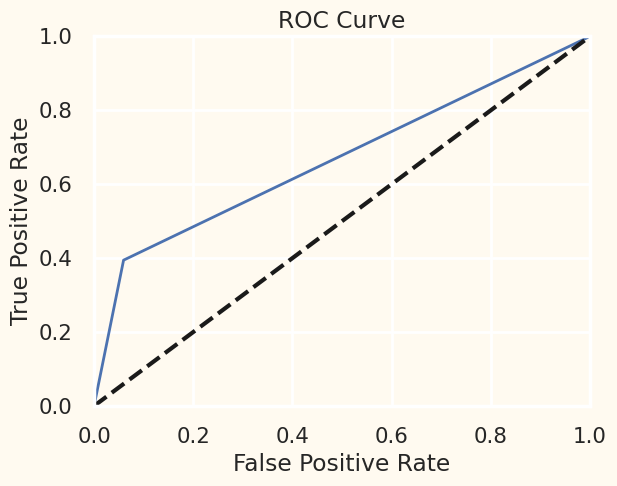

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)


##RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=None,min_samples_split= 10)
rf_clf.fit(X_train_std, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=400)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [ 200, 300,400],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }
# # Initialize Grid Search with Cross-Validation
# grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_std, y_train)

In [ ]:
 #grid_search.best_params_

In [ ]:
evaluate(rf_clf,X_train_std,X_test_std,y_train,y_test)

Training Results: 
--------------------------------------
Confusion Matrix: 
[[863   0]
 [ 87  79]]
Accuracy Score: 0.9154518950437318
classification Report: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.908421    1.000000  0.915452     0.954211      0.923195
recall       1.000000    0.475904  0.915452     0.737952      0.915452
f1-score     0.952013    0.644898  0.915452     0.798456      0.902469
support    863.000000  166.000000  0.915452  1029.000000   1029.000000
TESTING RESULTS: 
--------------------------------------
CONFUSION MATRIX:
[[365   5]
 [ 66   5]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.846868   0.500000  0.839002    0.673434      0.791023
recall       0.986486   0.070423  0.839002    0.528455      0.839002
f1-score     0.911361   0.123457  0.839002    0.517409      0.784510
support    370.000000  71.000000  0.839002  441.000000    441.0000

#ROC curve

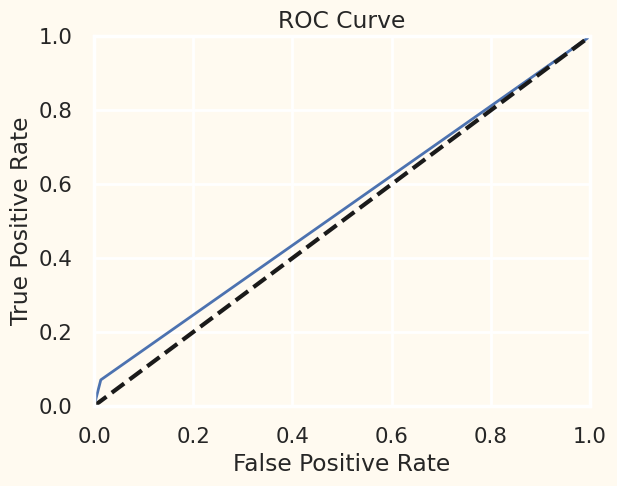

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

SVC(kernel='linear')

In [ ]:
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

Training Results: 
--------------------------------------
Confusion Matrix: 
[[855   8]
 [ 47 119]]
Accuracy Score: 0.9465500485908649
classification Report: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.947894    0.937008   0.94655     0.942451      0.946137
recall       0.990730    0.716867   0.94655     0.853799      0.946550
f1-score     0.968839    0.812287   0.94655     0.890563      0.943583
support    863.000000  166.000000   0.94655  1029.000000   1029.000000
TESTING RESULTS: 
--------------------------------------
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886889   0.519231  0.843537    0.703060      0.827697
recall       0.932432   0.380282  0.843537    0.656357      0.843537
f1-score     0.909091   0.439024  0.843537    0.674058      0.833411
support    370.000000  71.000000  0.843537  441.000000    441.0000

#Hyperparameter tuning for SVM

In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [ ]:
search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)



SVC(C=100, gamma=0.001)

In [ ]:
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

Training Results: 
--------------------------------------
Confusion Matrix: 
[[862   1]
 [  6 160]]
Accuracy Score: 0.9931972789115646
classification Report: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.993088    0.993789  0.993197     0.993438      0.993201
recall       0.998841    0.963855  0.993197     0.981348      0.993197
f1-score     0.995956    0.978593  0.993197     0.987275      0.993155
support    863.000000  166.000000  0.993197  1029.000000   1029.000000
TESTING RESULTS: 
--------------------------------------
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891753   0.547170   0.85034    0.719461      0.836276
recall       0.935135   0.408451   0.85034    0.671793      0.850340
f1-score     0.912929   0.467742   0.85034    0.690335      0.841255
support    370.000000  71.000000   0.85034  441.000000    441.0000

#ROC for SVC

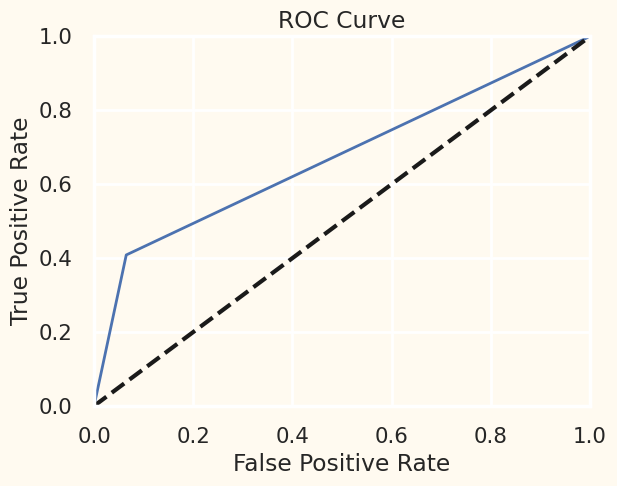

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

##XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Training Results: 
--------------------------------------
Confusion Matrix: 
[[863   0]
 [  0 166]]
Accuracy Score: 1.0
classification Report: 
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
--------------------------------------
CONFUSION MATRIX:
[[358  12]
 [ 48  23]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881773   0.657143  0.863946    0.769458      0.845608
recall       0.967568   0.323944  0.863946    0.645756      0.863946
f1-score     0.922680   0.433962  0.863946    0.678321      0.843998
support    370.000000  71.000000  0.863946  441.000000    441.000000


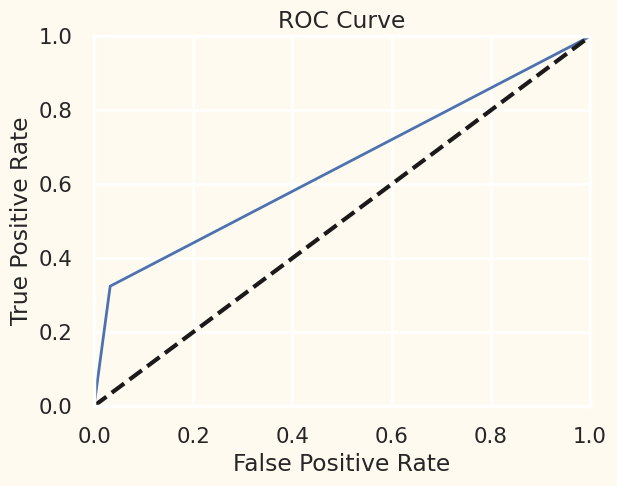

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

#ADABOOST CLASSIFIER

In [ ]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

Training Results: 
--------------------------------------
Confusion Matrix: 
[[855   8]
 [105  61]]
Accuracy Score: 0.8901846452866861
classification Report: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.890625    0.884058  0.890185     0.887341      0.889566
recall       0.990730    0.367470  0.890185     0.679100      0.890185
f1-score     0.938014    0.519149  0.890185     0.728582      0.870442
support    863.000000  166.000000  0.890185  1029.000000   1029.000000
TESTING RESULTS: 
--------------------------------------
CONFUSION MATRIX:
[[350  20]
 [ 56  15]]
ACCURACY SCORE:
0.8277
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.862069   0.428571  0.827664    0.645320      0.792277
recall       0.945946   0.211268  0.827664    0.578607      0.827664
f1-score     0.902062   0.283019  0.827664    0.592540      0.802397
support    370.000000  71.000000  0.827664  441.000000    441.0000

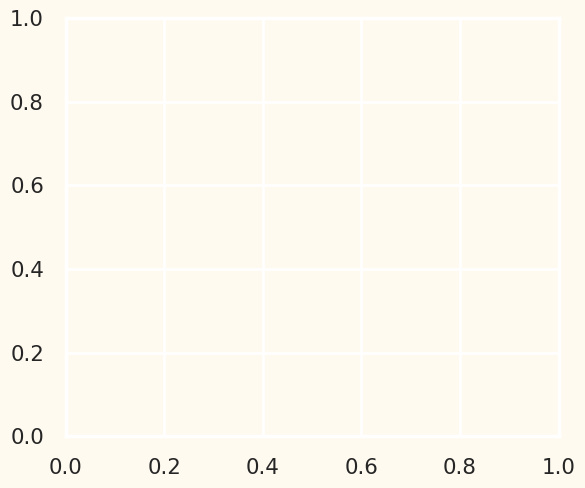

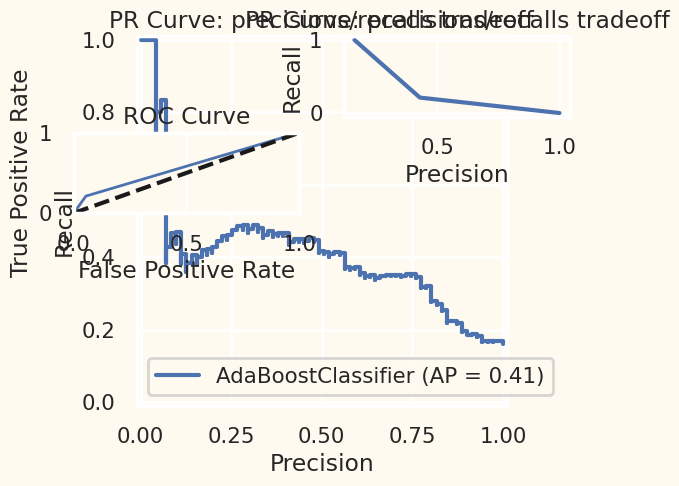

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
PrecisionRecallDisplay.from_estimator(ab_clf, X_test, y_test)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");


plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

#COMPARING MODEL PERFORMANCE

In [ ]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.500
XGBOOST                        roc_auc_score: 0.646
LOGISTIC REGRESSION            roc_auc_score: 0.546
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
ADABOOST                       roc_auc_score: 0.579


#Checking Data Imblance to increase accuracy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
df.OverTime.head()

,OverTime
0,Yes
1,No
2,Yes
3,Yes
4,No


#Using SMOTE for Data Balancing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


# Define features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Preprocessing steps
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the SMOTE and XGBoost pipeline
smote = SMOTE(random_state=42)
model = ImbPipeline(steps=[('preprocessor', preprocessor),
                           ('smote', smote),
                           ('classifier', xgb.XGBClassifier(random_state=42))
                          ])

# Define parameter grid for Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Create Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)

print("Best AUC Score:")
print(grid_search.best_score_)

# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))


Best Parameters:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best AUC Score:
0.8284834635608629
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.61      0.38      0.46        61

    accuracy                           0.88       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.86      0.88      0.87       441

Accuracy Score:
0.8798185941043084
AUC Score:
0.8146246764452113
